In [3]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

In [17]:
delta_m1545 = -1.545
delta_4455 = 4.455
delta_4955 = 4.955
delta_13455 = 13.455
d_m1545 = '-1.545'
d_4455 = '4.455'
d_4955 = '4.955'
d_13455 = '13.455'

In [18]:
df = pd.read_csv('./../../Data/QMC_Data/kz_qmc_samples/avg_observables.csv', sep=',')
deltas = np.array(df["delta"])
energies = np.array(df["energy"])
e_errors = np.array(df["energy_error"])
chks = np.array(df["chk"])
chk_errors = np.array(df["chk_error"])

In [19]:
qmcE_m1545 = np.array(df["energy"])[np.where(df["delta"]==delta_m1545)]
Eerr_m1545 = np.array(df["energy_error"])[np.where(df["delta"]==delta_m1545)]
qmcE_4455 = np.array(df["energy"])[np.where(df["delta"]==delta_4455)]
Eerr_4455 = np.array(df["energy_error"])[np.where(df["delta"]==delta_4455)]
qmcE_4955 = np.array(df["energy"])[np.where(df["delta"]==delta_4955)]
Eerr_4955 = np.array(df["energy_error"])[np.where(df["delta"]==delta_4955)]
qmcE_13455 = np.array(df["energy"])[np.where(df["delta"]==delta_13455)]
Eerr_13455 = np.array(df["energy_error"])[np.where(df["delta"]==delta_13455)]

In [5]:
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

In [11]:
def GetBestEs1(delta,moving_avg_fxn,window,exptrans,qmctrans):
    
    # Read in data
    VMC_train1 = np.load(f'../data/Final_Models/train_quantities/OneD_rnn/delta_{delta}/seed_111/vmc_only/Energy.npy')
    ExpData_train1 = np.load(f'../data/Final_Models/train_quantities/OneD_rnn/delta_{delta}/seed_111/Exp_data/Energy.npy')
    ExpHybrid_train1 = np.load(f'../data/Final_Models/train_quantities/OneD_rnn/delta_{delta}/seed_111/hybrid_train/{exptrans}_ds/lr_5e-05/Energy.npy')
    QMCData_train1 = np.load(f'../data/Final_Models/train_quantities/OneD_rnn/delta_{delta}/seed_111/QMC_data/dset_size_1000/Energy.npy')
    QMCHybrid_train1 = np.load(f'../data/Final_Models/train_quantities/OneD_rnn/delta_{delta}/seed_111/hybrid_train/hybrid_QMC_data/dset_size_1000/{qmctrans}_ds/lr_5e-05/Energy.npy')    

    # Take lowest energy of moving average for each model
    VMC_E = np.min(moving_avg_fxn(VMC_train1,window))
    ExpData_E = np.min(moving_avg_fxn(ExpData_train1,window))
    ExpHybrid_E = np.min(moving_avg_fxn(ExpHybrid_train1,window))
    QMCData_E = np.min(moving_avg_fxn(QMCData_train1,window))
    QMCHybrid_E = np.min(moving_avg_fxn(QMCHybrid_train1,window))
    
    return VMC_E, ExpData_E, ExpHybrid_E, QMCData_E, QMCHybrid_E

In [30]:
def GetBestEs2(delta,moving_avg_fxn,window,exptrans,qmctrans):
    
    # Read in data
    VMC_train2 = np.load(f'../data/Final_Models/train_quantities/TwoD_rnn/delta_{delta}/seed_111/vmc_only/Energy.npy')
    Data_train2 = np.load(f'../data/Final_Models/train_quantities/TwoD_rnn/delta_{delta}/seed_111/Exp_data/Energy.npy')
    Hybrid_train2 = np.load(f'../data/Final_Models/train_quantities/TwoD_rnn/delta_{delta}/seed_111/hybrid_train/100_ds/lr_0.001/Energy.npy')
    QMCData_train2 = np.load(f'../data/Final_Models/train_quantities/TwoD_rnn/delta_{delta}/seed_111/QMC_data/dset_size_1000/Energy.npy')
    QMCHybrid_train2 = np.load(f'../data/Final_Models/train_quantities/TwoD_rnn/delta_{delta}/seed_111/hybrid_train/hybrid_QMC_data/dset_size_1000/{qmctrans}_ds/lr_0.001/Energy.npy')    

    # Take lowest energy of moving average for each model
    VMC_E = np.min(moving_avg_fxn(VMC_train2,window))
    ExpData_E = np.min(moving_avg_fxn(Data_train2,window))
    ExpHybrid_E = np.min(moving_avg_fxn(Hybrid_train2,window))
    QMCData_E = np.nanmin(moving_avg_fxn(QMCData_train2,window))
    QMCHybrid_E = np.min(moving_avg_fxn(QMCHybrid_train2,window))

    return VMC_E, ExpData_E, ExpHybrid_E, QMCData_E, QMCHybrid_E

In [31]:
ExpData_Es1 =[]
ExpH_Es1 = []
QMCData_Es1 =[]
QMCH_Es1 = []
ExpData_Es2 =[]
ExpH_Es2 = []
QMCData_Es2 =[]
QMCH_Es2 = []

deltas = np.array([-1.545,4.455,4.955,13.455])
window = 25
exp_t_trans1 = np.array([510,9100,1900,890])
exp_t_trans2 = np.array([70,50,30,90])
qmc_t_trans1 = np.array([490,810,9350,7390])
qmc_t_trans2 = np.array([70,50,50,110])

for i in range(len(deltas)):
    delta_ = deltas[i]
    exptrans1 = exp_t_trans1[i]
    qmctrans1 = qmc_t_trans1[i]
    exptrans2 = exp_t_trans2[i]
    qmctrans2 = qmc_t_trans2[i]
    
    VMC1, ExpData_E1, ExpH_E1, QMCData_E1, QMCH_E1 = GetBestEs1(delta_,movingaverage,window,exptrans1,qmctrans1)
    VMC2, ExpData_E2, ExpH_E2, QMCData_E2, QMCH_E2 = GetBestEs2(delta_,movingaverage,window,exptrans2,qmctrans2)
    
    ExpData_Es1.append(ExpData_E1)
    ExpH_Es1.append(ExpH_E1)
    QMCData_Es1.append(QMCData_E1)
    QMCH_Es1.append(QMCH_E1)
    ExpData_Es2.append(ExpData_E2)
    ExpH_Es2.append(ExpH_E2)
    QMCData_Es2.append(QMCData_E2)
    QMCH_Es2.append(QMCH_E2)

In [32]:
OneD_energies = np.array([ExpData_Es1,ExpH_Es1,QMCData_Es1,QMCH_Es1])
TwoD_energies = np.array([ExpData_Es2,ExpH_Es2,QMCData_Es2,QMCH_Es2])
compare = np.repeat(np.array([qmcE_m1545,qmcE_4455,qmcE_4955,qmcE_13455]),4,axis=1)
OneD_residuals = abs(OneD_energies-compare.T)
TwoD_residuals = abs(TwoD_energies-compare.T)

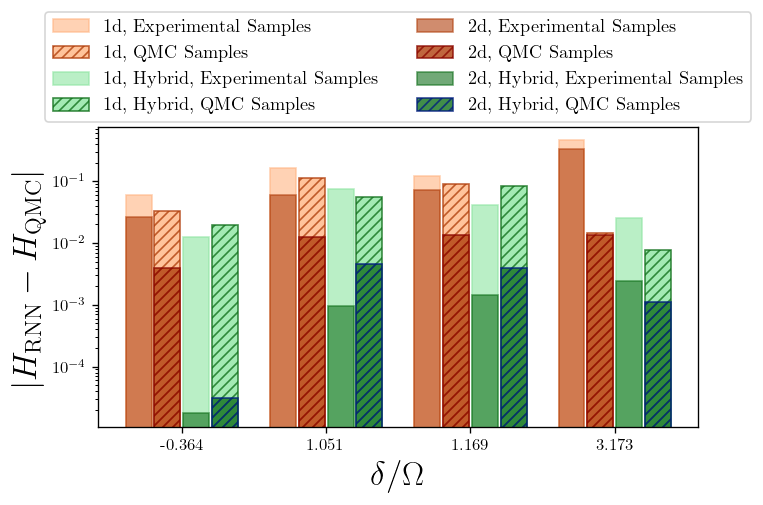

In [33]:
plt.rcParams.update({"text.usetex":True,"font.family": "Helvetica"})
X = np.arange(4)
X_axis = ['-0.364','1.051','1.169','3.173']
fig = plt.figure(1,figsize=(5,2.5), dpi=120, facecolor='w', edgecolor='k')
ax = fig.add_axes([0,0,1,1])
colors1 = sns.color_palette('pastel')
colors2 = sns.color_palette('dark')
ax.bar(X - 0.3, OneD_residuals[0], color = colors1[1], alpha=0.6, width = 0.18, edgecolor=colors1[1], linewidth=1, label='1d, Experimental Samples')
ax.bar(X - 0.1, OneD_residuals[2], color = colors1[1], alpha=0.8, width = 0.18, edgecolor=colors2[1], fill=True, hatch='////', linewidth=1, label='1d, QMC Samples')
ax.bar(X + 0.1, OneD_residuals[1], color = colors1[2], alpha=0.6, width = 0.18, edgecolor=colors1[2], label='1d, Hybrid, Experimental Samples')
ax.bar(X + 0.3, OneD_residuals[3], color = colors1[2], alpha=0.8, width = 0.18, edgecolor=colors2[2], fill=True, hatch='////', linewidth=1, label='1d, Hybrid, QMC Samples')
ax.bar(X - 0.3, TwoD_residuals[0], color = colors2[1], alpha=0.6, width = 0.18, edgecolor=colors2[1], label='2d, Experimental Samples')
ax.bar(X - 0.1, TwoD_residuals[2], color = colors2[1], alpha=0.8, width = 0.18, edgecolor=colors2[3], fill=True, hatch='////', linewidth=1, label='2d, QMC Samples')
ax.bar(X + 0.1, TwoD_residuals[1], color = colors2[2], alpha=0.6, width = 0.18, edgecolor=colors2[2], label='2d, Hybrid, Experimental Samples')
ax.bar(X + 0.3, TwoD_residuals[3], color = colors2[2], alpha=0.8, width = 0.18, edgecolor=colors2[0], fill=True, hatch='////', linewidth=1, label='2d, Hybrid, QMC Samples')
plt.xticks(X, X_axis)
plt.xticks(X, X_axis)
ax.set_yscale('log')
plt.ylabel('$|H_{\\mathrm{RNN}}-H_{\\mathrm{QMC}}|$',fontsize=20)
plt.legend(loc='center', ncol=2,bbox_to_anchor=(0.5, 1.2),fontsize=11)
plt.xlabel('$\\delta/\\Omega$',fontsize=20)
plt.show()